In [ ]:
!pip install kaggle

from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'flowers',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'flowers',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 85s 671ms/step - accuracy: 0.6077 - loss: 7.7486 - val_accuracy: 0.7465 - val_loss: 0.7920
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 69s 632ms/step - accuracy: 0.8325 - loss: 0.5812 - val_accuracy: 0.7849 - val_loss: 0.6186
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 59s 545ms/step - accuracy: 0.8733 - loss: 0.3735 - val_accuracy: 0.8233 - val_loss: 0.6223
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 60s 548ms/step - accuracy: 0.9012 - loss: 0.2889 - val_accuracy: 0.8267 - val_loss: 0.5393
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 59s 545ms/step - accuracy: 0.9189 - loss: 0.2497 - val_accuracy: 0.8151 - val_loss: 0.6834


In [5]:
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return train_generator.class_indices,predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
Predicted Class: rose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


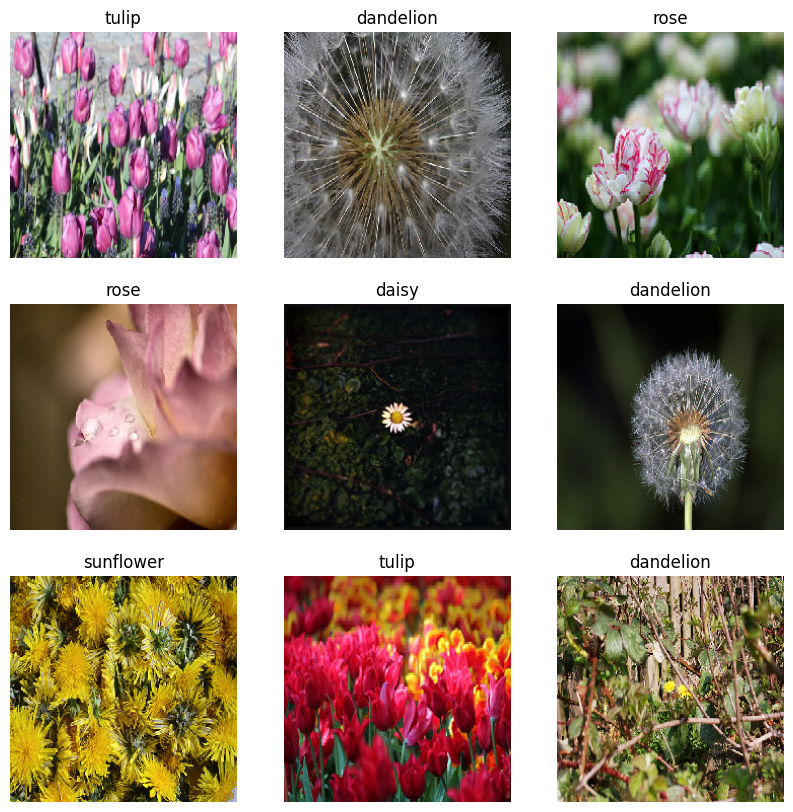

In [7]:
image_path = "/content/images.jpeg"
class_indices, predicted_class = predict_image(image_path)
print(f"Predicted Class: {list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]}")
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 10))
for i in range(9):
    image_index = random.randint(0, len(validation_generator.filenames)-1)
    image_path = 'flowers/' + validation_generator.filenames[image_index]
    class_indices, predicted_class = predict_image(image_path)
    img = keras.preprocessing.image.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.subplot(3,3, i + 1)
    plt.imshow(img)
    plt.title(list(class_indices.keys())[list(class_indices.values()).index(predicted_class)])
    plt.axis('off')
plt.show()
